In [1]:
# Imports for non-released version
import os
import sys
import matplotlib.pyplot as plt

# Add the local src directory to the path
sys.path.append('../gbapy/')

# Load the GBA_model class
from GbaModel import *

In [2]:
# Load model directly from csv folder
model = read_csv_model("../examples/toy_models/D")

In [3]:
# Clean up previous trajectory data
model.clear_gradient_ascent_trajectory()

# Read first f0 from csv
model.read_LP_from_csv()

In [4]:
# Check if cleared
model.GA_tracker

""


###  Gradient Ascent flux/growthrate and protein comparison

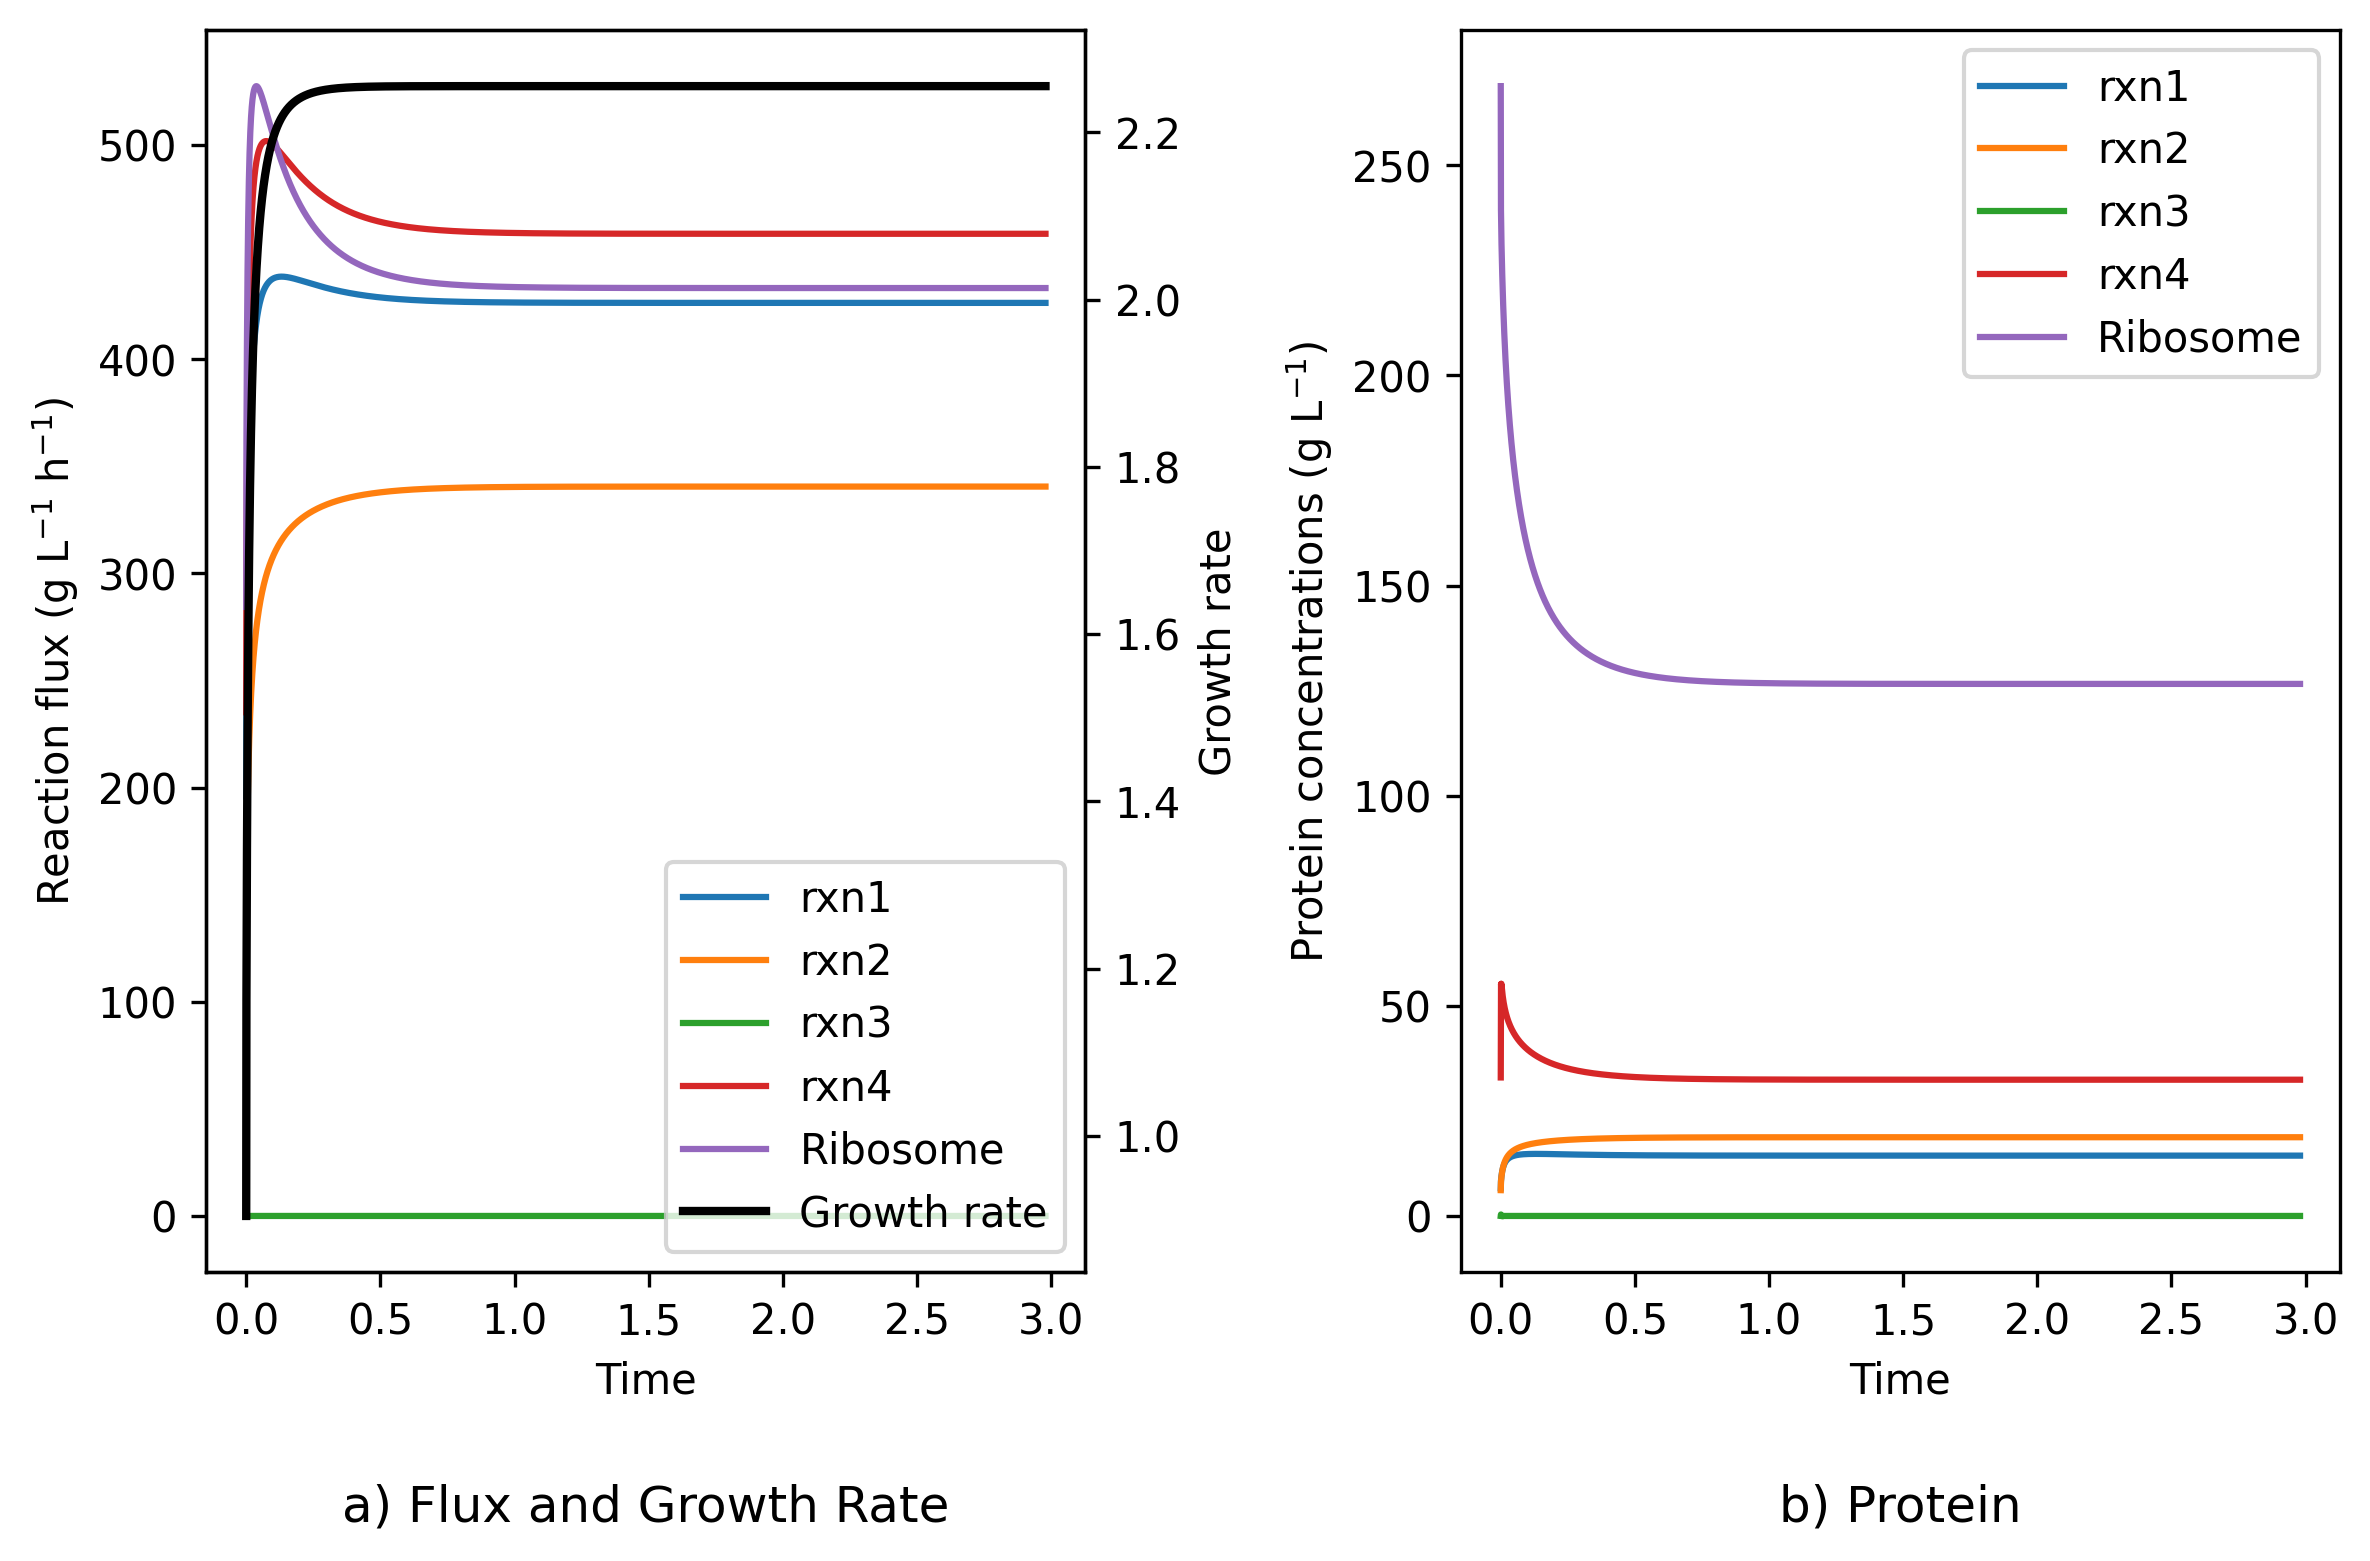

In [5]:
# Clear previous trajectories and set up model for reaction fluxes
model.clear_gradient_ascent_trajectory()
model.set_f0(model.LP_solution)
model.gradient_ascent(condition="1", initial_dt=0.001, track=True, saved_values=["v"], label=1)

# Extract reaction flux data
DfluxCon1 = model.GA_tracker[["rxn1.v", "rxn2.v", "rxn3.v", "rxn4.v", "Ribosome.v"]]
time = model.GA_tracker["t"]
growthrate = model.GA_tracker["mu"]

# Clear previous trajectories and set up model for protein concentrations
model.clear_gradient_ascent_trajectory()
model.set_f0(model.LP_solution)
model.gradient_ascent(condition="1", initial_dt=0.001, track=True, saved_values=["p"], label=1)

# Extract protein concentration data
DfluxCon2 = model.GA_tracker[["rxn1.p", "rxn2.p", "rxn3.p", "rxn4.p", "Ribosome.p"]]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), dpi=300)  # 1 row, 2 columns

# Plot reaction fluxes on the first subplot (left side)
for column in DfluxCon1:
    label = column.replace('.v', '')
    ax1.plot(time, DfluxCon1[column], label=label)

ax1.set_xlabel('Time')
ax1.set_ylabel(r'Reaction flux (g L$^{-1}$ h$^{-1}$)')

ax3 = ax1.twinx() 
ax3.plot(time, growthrate, label='Growth rate', color='black', linewidth=2)
ax3.set_ylabel('Growth rate', color='black')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax3.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower right')
ax1.text(0.5, -0.2, 'a) Flux and Growth Rate', transform=ax1.transAxes, fontsize=12, ha='center')

# Plot protein concentrations on the second subplot (right side)
for column in DfluxCon2:
    label = column.replace('.p', '')  
    ax2.plot(time, DfluxCon2[column], label=label)

ax2.set_xlabel('Time')
ax2.set_ylabel(r'Protein concentrations (g L$^{-1}$)')
ax2.legend(loc='upper right')
ax2.text(0.5, -0.2, 'b) Protein', transform=ax2.transAxes, fontsize=12, ha='center')

plt.tight_layout(rect=[0, 0.1, 1, 1]) 
plt.savefig("GA_reaction_flux_protein_plot.png", dpi=300)
plt.show()



### Gradient Ascent run from optimum f0

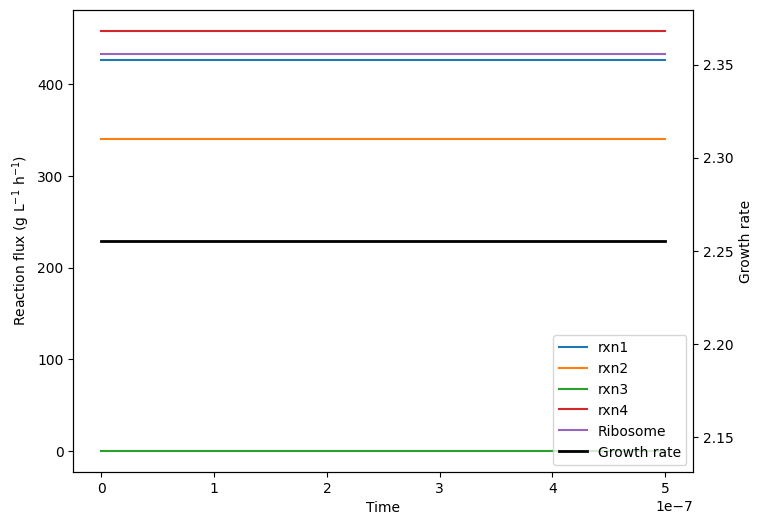

In [6]:
import matplotlib.pyplot as plt

# Clear previous trajectories and set up model
model.clear_gradient_ascent_trajectory()
# Set optimum solution
model.set_f0([0.5559145775759466,0.4440854224240534,1e-10,0.5979934441183267,0.5649557167085288])
model.gradient_ascent(condition="1", initial_dt=0.0001, track=True, saved_values=["v"], label=1)

# Extract data
DfluxCon1 = model.GA_tracker[["rxn1.v", "rxn2.v", "rxn3.v", "rxn4.v", "Ribosome.v"]]
time = model.GA_tracker["t"]
growthrate = model.GA_tracker["mu"]


fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot reaction fluxes on the primary y-axis (left side)
for column in DfluxCon1:
    label = column.replace('.v', '')
    ax1.plot(time, DfluxCon1[column], label=label)

ax1.set_xlabel('Time')
ax1.set_ylabel(r'Reaction flux (g L$^{-1}$ h$^{-1}$)')

ax2 = ax1.twinx()
ax2.plot(time, growthrate, label='Growth rate', color='black', linewidth=2)

ax2.set_ylabel('Growth rate', color='black')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower right')

plt.savefig("GA_reaction_flux_growthrate_plot.png", dpi=300)
plt.show()


